In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

matplotlib.rcParams['figure.figsize'] = (12, 8)

import warnings

warnings.filterwarnings('ignore')

# k Nearest Neighbors (kNN)
Метод k ближайших соседей рассчитывает расстояния от нового объекта до всех объектов выборки и, отбирая k ближайших, предсказывает целевую переменную с помощью голосования (в случае классификации) или усреднения (в случае регрессии). \
При этом этот метод можно по-разному настраивать, например можно изменить способ подсчета расстояний или способ взвешивания соседей по расстоянию. \
Для начала скачаем датасет и визуализируем данные.

In [2]:
circ = pd.read_csv('Data/concertriccir2.csv')
circ.head()

,X,Y,class
0,0.70,-0.247,0.0
1,-3.95,2.740,1.0
2,0.15,-2.160,1.0
3,-1.67,-0.942,1.0
4,2.56,-1.850,1.0


<Axes: xlabel='X', ylabel='Y'>

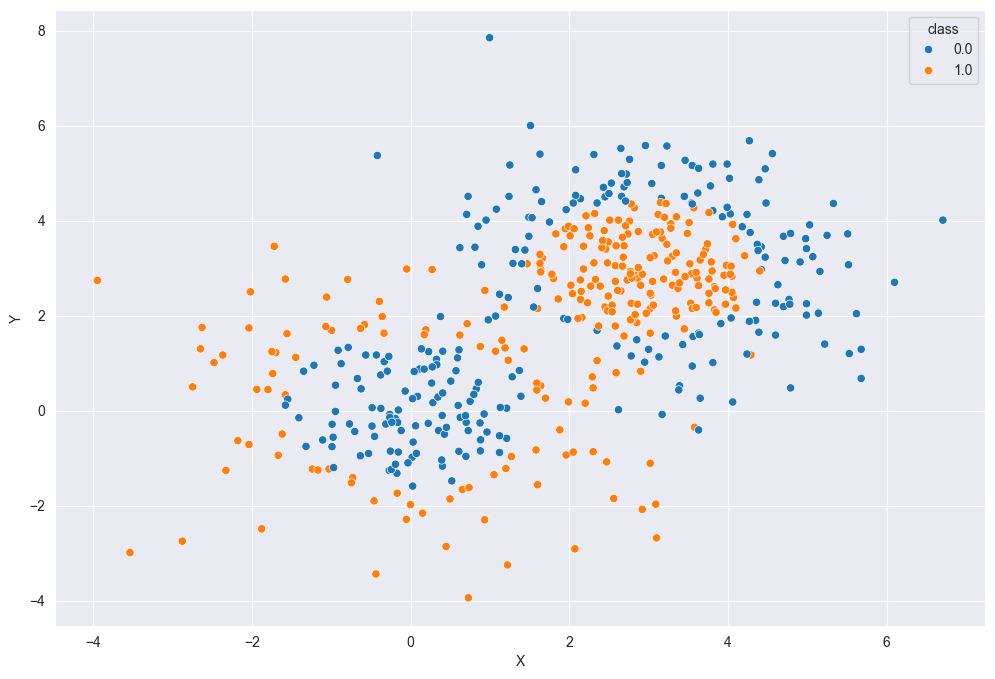

In [3]:
sns.scatterplot(x=circ['X'], y=circ['Y'], hue=circ['class'])

**Задание 1.** Обучите логистическую регрессию на данных и нарисуйте разделяющую гиперплоскость (прямую) на рисунке с данными. Как линейный классификатор справился с задачей? Сделайте вывод исходя из геометрии данных и линии разделения. Какой accuracy выйдет на всей выборке (без валидации)?

0.424

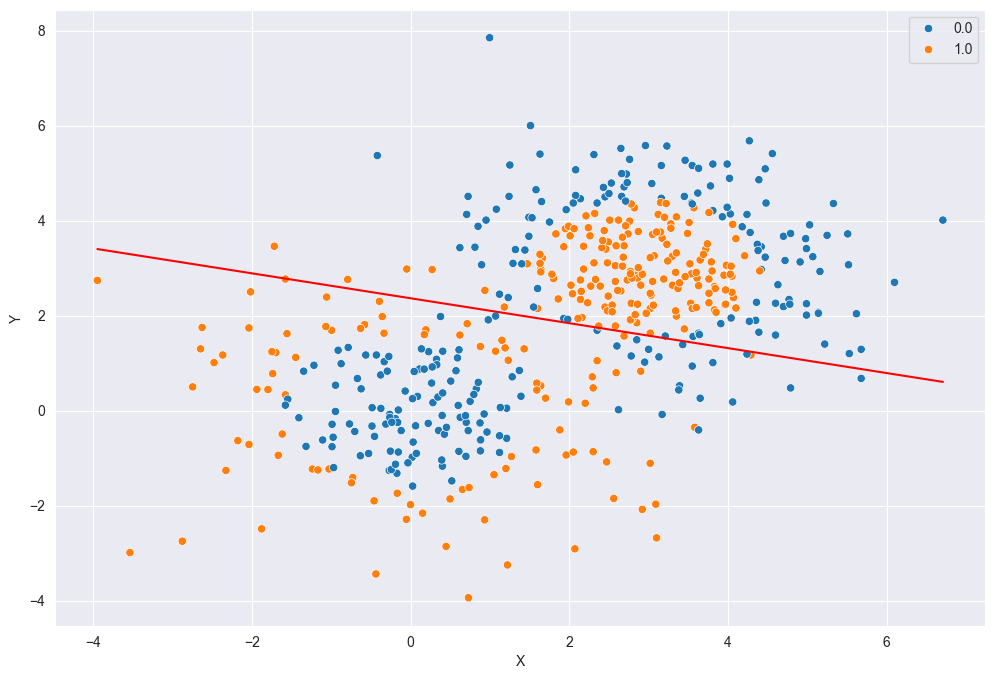

In [4]:
from sklearn.linear_model import LogisticRegression

### Your code is here

sns.scatterplot(x=circ['X'], y=circ['Y'], hue=circ['class'])

lr = LogisticRegression(fit_intercept=True)
lr.fit(X=pd.concat([circ['X'], circ['Y']], axis=1), y=circ['class'])

x_arr = np.linspace(circ['X'].min(), circ['X'].max(), 100)
sns.lineplot(x=x_arr, y=-(x_arr * lr.coef_[0, 0] + lr.intercept_) / lr.coef_[0, 1], color='red')

lr.score(X=pd.concat([circ['X'], circ['Y']], axis=1), y=circ['class'])

**Задание 2.** Разделите обучающую выборку и обучите 6 моделей kNN с различным числом соседей из `all_k`, сохраните обученные классификаторы в список. \
Выведите accuracy на тренировочной и тестовой выборке для каждой модели. Каково оптимальное число соседей с точки зрения accuracy?

In [5]:
X = circ[['X', 'Y']].values
y = circ['class'].values.astype('int')

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    shuffle=True, random_state=2022)

In [7]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

all_k = [1, 3, 10, 30, 40, 60]

### Your code is here
knn_gs = GridSearchCV(estimator=KNeighborsClassifier(),
                      param_grid={'n_neighbors': all_k},
                      return_train_score=True,
                      scoring='accuracy',
                      cv=6)

knn_gs.fit(X_train, y_train)

print(*[f'train - {a.round(3)}, test - {b.round(3)} | mean - {np.mean([a, b]).round(3)}' for a, b in
        zip(knn_gs.cv_results_['mean_train_score'], knn_gs.cv_results_['mean_test_score'])], sep='\n', end='\n\n')
print(knn_gs.best_params_, knn_gs.best_score_.round(3))

train - 1.0, test - 0.895 | mean - 0.947
train - 0.946, test - 0.903 | mean - 0.924
train - 0.907, test - 0.857 | mean - 0.882
train - 0.829, test - 0.785 | mean - 0.807
train - 0.765, test - 0.732 | mean - 0.748
train - 0.67, test - 0.655 | mean - 0.662

{'n_neighbors': 3} 0.903


**Задание 3.** (бонусное) Скачайте библиотку [mlxtend](http://rasbt.github.io/mlxtend/#examples) для визуализации решающих поверхностей. 
В документации можно ознакомиться с [примерами](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) изображения решающих поверхностей для различных моделей. \
Построим несколько таких графиков для шести обученных нами kNN.

1. Подберите параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов. 
2. Удобно перед визулизацией сохранить обученные классификаторы в список `all_clfs`.
3. Проявите терпение! Отрисовка решающих поверхностей может занимать пару минут.

In [8]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools

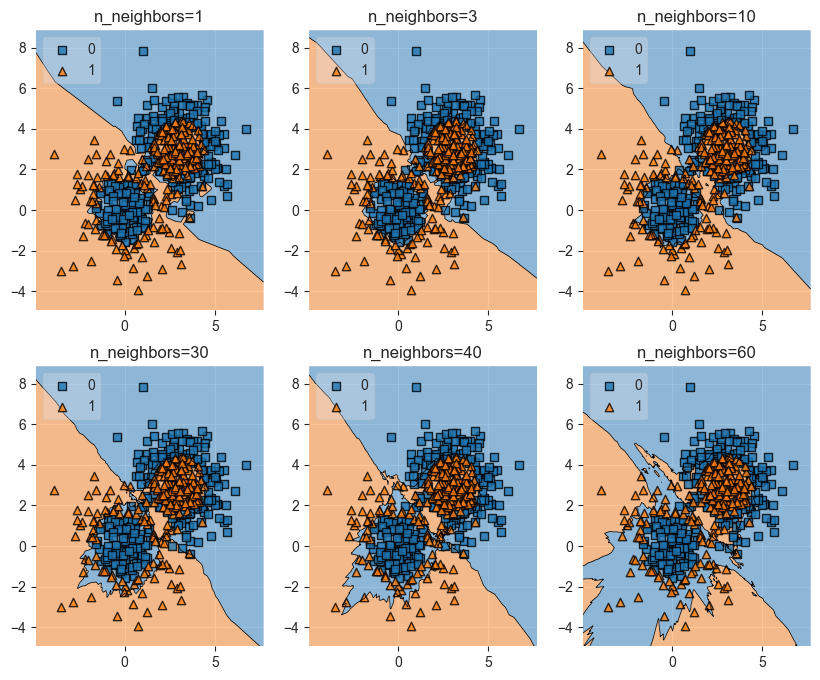

In [9]:
### Your code is here
gs = gridspec.GridSpec(2, 3)
fig = plt.figure(figsize=(10, 8))

clf1 = KNeighborsClassifier(n_neighbors=1)
clf2 = KNeighborsClassifier(n_neighbors=3)
clf3 = KNeighborsClassifier(n_neighbors=10)
clf4 = KNeighborsClassifier(n_neighbors=30)
clf5 = KNeighborsClassifier(n_neighbors=40)
clf6 = KNeighborsClassifier(n_neighbors=60)

labels = ['n_neighbors=1',
          'n_neighbors=3',
          'n_neighbors=10',
          'n_neighbors=30',
          'n_neighbors=40',
          'n_neighbors=60']

for clf, lab, grd in zip([clf1, clf2, clf3, clf4, clf5, clf6],
                         labels,
                         itertools.product(range(2), range(3))):
    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y,
                                clf=clf, legend=2)
    plt.title(lab)

plt.show()

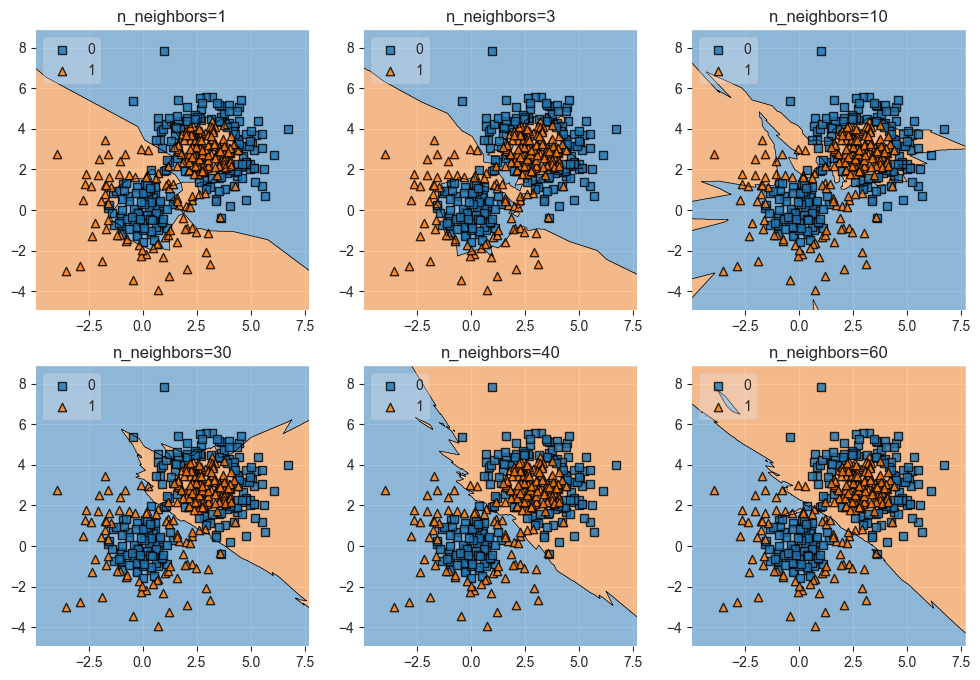

In [10]:
for clf, lab, grd in zip([clf1, clf2, clf3, clf4, clf5, clf6],
                         labels,
                         itertools.product(range(2), range(3))):
    clf.fit(X_test, y_test)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X_train, y=y_train,
                                clf=clf, legend=2)
    plt.title(lab)

plt.show()

1. Как меняется решающая поверхность с ростом числа соседей?
2. Какое оптимальное число соседей с точки зрения устройства данных и геометрии решающих поверхностей? Поясните свой ответ, опираясь на полученные графики.
3. Лучше ли справляется kNN по сравнению с логистической регрессией?

**Задание 4.** Скачайте уже известный вам датасет [SigmaCabs](https://www.kaggle.com/datasets/arashnic/taxi-pricing-with-mobility-analytics). Обучите классификатор kNN на отнормированных и не отнормированных данных, подобрав лучшие гиперпараметры среди $k \in [1, 5, 10]$. Замерьте качество на тестовой выборке. \
Почему нормирование данных помогает улучшить качество?

In [11]:
df = pd.read_csv('Data/processed_sigma_cabs.csv')
df.head()

,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Surge_Pricing_Type,Type_of_Cab_B,...,Destination_Type_F,Destination_Type_G,Destination_Type_H,Destination_Type_I,Destination_Type_J,Destination_Type_K,Destination_Type_L,Destination_Type_M,Destination_Type_N,Gender_Male
0,6.77,1.0,2.42769,3.90500,0,40.0,46,60,2,1,...,0,0,0,0,0,0,0,0,0,0
1,29.47,10.0,2.78245,3.45000,0,38.0,56,78,2,1,...,0,0,0,0,0,0,0,0,0,1
2,41.58,10.0,2.79805,3.50125,2,61.0,56,77,2,1,...,0,0,0,0,0,0,0,0,0,1
3,61.56,10.0,2.79805,3.45375,0,61.0,52,74,3,0,...,0,0,0,0,0,0,0,0,0,1
4,54.95,10.0,3.03453,3.40250,4,51.0,49,102,2,0,...,0,0,0,0,0,0,0,0,0,1


In [62]:
X = df.drop('Surge_Pricing_Type', axis=1)
y = df['Surge_Pricing_Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    shuffle=True, random_state=2022)

In [68]:
### Your code is here
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report

param_grid = [{'knn__n_neighbors': [1, 5, 10]}]

pipe_knn_norm = Pipeline(steps=[('minmax', MinMaxScaler()),
                                ('knn', KNeighborsClassifier())])

knn_gs1 = GridSearchCV(estimator=pipe_knn_norm, param_grid=param_grid, cv=5)
knn_gs1.fit(X_train, y_train)
print(classification_report(y_test, knn_gs1.predict(X_test)), end='\n\n')
print(knn_gs1.best_params_)

              precision    recall  f1-score   support

           1       0.66      0.56      0.61      5372
           2       0.63      0.79      0.70     11349
           3       0.72      0.57      0.64      9612

    accuracy                           0.66     26333
   macro avg       0.67      0.64      0.65     26333
weighted avg       0.67      0.66      0.66     26333


{'knn__n_neighbors': 10}


In [69]:
pipe_knn = Pipeline(steps=[('knn', KNeighborsClassifier())])
knn_gs2 = GridSearchCV(estimator=pipe_knn, param_grid=param_grid, cv=5)
knn_gs2.fit(X_train, y_train)
print(classification_report(y_test, knn_gs2.predict(X_test)), end='\n\n')
print(knn_gs2.best_params_)

              precision    recall  f1-score   support

           1       0.35      0.30      0.32      5372
           2       0.48      0.63      0.54     11349
           3       0.53      0.38      0.44      9612

    accuracy                           0.47     26333
   macro avg       0.45      0.44      0.44     26333
weighted avg       0.47      0.47      0.46     26333


{'knn__n_neighbors': 10}


**Задание 5.** Обучите классификатор kNN на отнормированных данных с помощью метрики Минковского. 
$$
\rho(x, z) = \bigg(\sum_i |x_i - z_i|^p\bigg) ^{1/p}
$$

Значение параметра `p` возьмите равным единице. Замерьте качество на тестовой выборке и сравните с предыдущим заданием, где `p = 2`.

In [72]:
### Your code is here

pipe_knn_p = Pipeline(steps=[
    ('minmax', MinMaxScaler()),
    ('knn', KNeighborsClassifier(metric="minkowski", p=1, n_neighbors=10))])

pipe_knn_p.fit(X_train, y_train)
print(classification_report(y_test, pipe_knn_p.predict(X_test), digits=2), end='\n\n')

              precision    recall  f1-score   support

           1       0.65      0.57      0.61      5372
           2       0.63      0.79      0.70     11349
           3       0.73      0.57      0.64      9612

    accuracy                           0.66     26333
   macro avg       0.67      0.64      0.65     26333
weighted avg       0.67      0.66      0.66     26333




In [73]:
pipe_knn_p.named_steps['knn'].kneighbors(X=X_train.iloc[0, :].values.reshape(1, -1))

(array([[316.27630171, 316.41799137, 316.44922059, 316.50394982,
         316.56599442, 316.5966921 , 316.63029745, 316.64032159,
         316.65862243, 316.67182501]]),
 array([[13034, 46838, 55026,  4527, 72708, 47585, 30204,  3920, 59867,
         54536]], dtype=int64))

**Задание 6.** Скачайте датасет [California Housing Prices](https://www.kaggle.com/datasets/camnugent/california-housing-prices), в котором мы будем предсказывать среднюю стоимость жилья. В качестве признаков будем использовать `['longitude', 'latitude']`, посмотрите на них с помощью scatterplot. \
По какой характеристике наш kNN регрессор в этом случае подбирает соседей?

1. Обучите обыкновенную линейную регрессию и замерьте RMSE на тренировочной и тестовой выборках.
2. Обучите kNN регрессор на отнормированных данных, подобрав лучшие гиперпараметры $k \in [1, 2, ..., 9]$. 
3. Обучите kNN регрессор с гауссовским ядром, взяв параметр k из предыдущего пункта и подобрав оптимальное значение ширины окна среди предложенных $h \in np.arange(0.02, 0.1, 0.01)$.

Как ширина окна влияет на веса при усреднении ответа по соседям? 

In [74]:
df = pd.read_csv('Data/housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


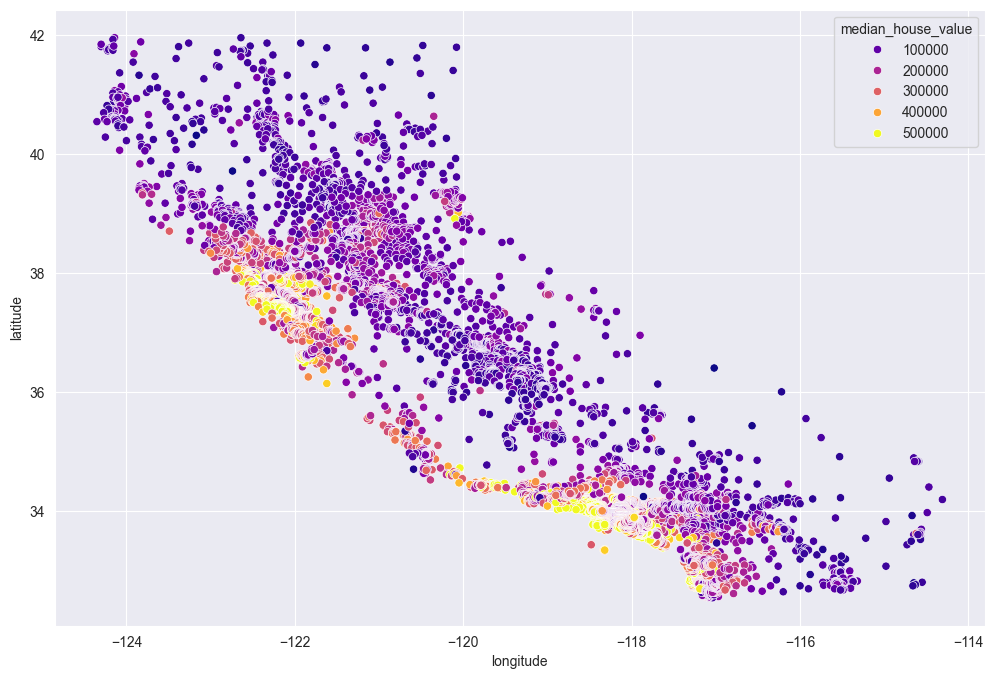

In [77]:
X = df[['longitude', 'latitude']]
y = df['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    shuffle=True, random_state=2022)
sns.scatterplot(x='longitude', y='latitude', data=X, hue=y, palette='plasma');

In [86]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error

lr = LinearRegression()
lr.fit(X_train, y_train)
(root_mean_squared_error(y_train, lr.predict(X_train)).__round__(3),
 root_mean_squared_error(y_test, lr.predict(X_test)).__round__(3))

(100948.4, 98369.877)

In [93]:
from sklearn.neighbors import KNeighborsRegressor

param_grid = {'knn_reg__n_neighbors': np.arange(1, 10)}

pipe_knn_reg = Pipeline(steps=[('minmax', MinMaxScaler()),
                               ('knn_reg', KNeighborsRegressor())])

knn_reg_gs = GridSearchCV(estimator=pipe_knn_reg, param_grid=param_grid)
knn_reg_gs.fit(X_train, y_train)

print(knn_reg_gs.best_params_)

(root_mean_squared_error(y_train, knn_reg_gs.predict(X_train)).__round__(3),
 root_mean_squared_error(y_test, knn_reg_gs.predict(X_test)).__round__(3))

{'knn_reg__n_neighbors': 5}


(42009.901, 51617.059)

In [116]:
results = []

for h in np.arange(0.02, 0.1, 0.01):
    def gaussian_kernel(distances):
        const = 1 / (np.sqrt(2 * np.pi))
        power = (-1 / 2) * distances ** 2 / h ** 2

        return const * np.exp(power)


    pipe_knn_reg_kernel = Pipeline(steps=[('minmax', MinMaxScaler()),
                                          ('knn_reg', KNeighborsRegressor(weights=gaussian_kernel))])

    param_grid = {'knn_reg__n_neighbors': np.arange(1, 10)}

    knn_reg_kernel_gs = GridSearchCV(estimator=pipe_knn_reg_kernel, param_grid=param_grid)
    knn_reg_kernel_gs.fit(X_train, y_train)

    results.append({'h': h.round(2),
                 'n_neighbors': knn_reg_kernel_gs.best_params_['knn_reg__n_neighbors'],
                 'rmse_train': root_mean_squared_error(y_train, knn_reg_kernel_gs.predict(X_train)).__round__(3),
                 'rmse_test': root_mean_squared_error(y_test, knn_reg_kernel_gs.predict(X_test)).__round__(3)})

In [119]:
sorted(results, key=lambda x: x['h'])

[{'h': 0.02,
  'n_neighbors': 5,
  'rmse_train': 41796.693,
  'rmse_test': 51588.366},
 {'h': 0.03,
  'n_neighbors': 5,
  'rmse_train': 41913.706,
  'rmse_test': 51602.242},
 {'h': 0.04,
  'n_neighbors': 5,
  'rmse_train': 41955.821,
  'rmse_test': 51608.105},
 {'h': 0.05,
  'n_neighbors': 5,
  'rmse_train': 41975.311,
  'rmse_test': 51611.119},
 {'h': 0.06,
  'n_neighbors': 5,
  'rmse_train': 41985.892,
  'rmse_test': 51612.852},
 {'h': 0.07, 'n_neighbors': 5, 'rmse_train': 41992.27, 'rmse_test': 51613.931},
 {'h': 0.08,
  'n_neighbors': 5,
  'rmse_train': 41996.407,
  'rmse_test': 51614.645},
 {'h': 0.09,
  'n_neighbors': 5,
  'rmse_train': 41999.242,
  'rmse_test': 51615.142}]